<center><h1>DSCI 552 HW7</h1></center>
<br>
<center><font size="4"></font></center>
<br />
<table align="center">
    <tbody>
    <tr><td>Name</td><td>Parth Patel</td></tr>
    <tr><td>USC ID</td><td>5228107917</td></tr>
     <tr><td>Github Username</td><td>parthpar-usc</td></tr>
    <tr><td>Email</td><td>parthpar@usc.edu</td></tr>
    </tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, hamming_loss
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold
#from skmultilearn.problem_transform import LabelPowerset
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import warnings
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
data

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [4]:
xData = data.iloc[:, : 22]
yData = data[['Family', 'Genus', 'Species']]

In [5]:
xData

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
0    -0.150063 -0.171128  0.124676  ... -0.156436  0.082245  0.135752   
1    -0.222475 -0.207693  0.170883  ... -0.254341  0.022786  0.163320   
2    -0.242234 -0.219153  0.232538  ... -0.237384  0.050791  0.207338   
3    -0.194347 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413   
4    -0.265423 -0.172700  0.266434  ... -0.298524  0.037439  0.219153   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ... -0.145668 -0.059364  0.024206   
7191 -0.116460  0.063727  0.089034  ... -0.164675 -0.105600  0.030767   
7192 -0.103317  0.070370  0.081317  ... -0.150025 -0.078615  0.024861   
7193 -0.115799  0.056979  0.089316  ... -0.153120 -0.075320  0.022903   
7194 -0.117672  0.058874  0.076180  ... -0.150554 -0.073415  0.042517   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
0    -0.024017 -0.108351 -0.077623 -0.009568  0.057684  0.118680  0.014038  
1     0.012022 -0.090974 -0.056510 -0.035303  0.020140  0.082263  0.029056  
2     0.083536 -0.050691 -0.023590 -0.066722 -0.025083  0.099108  0.077162  
3    -0.050224 -0.136009 -0.177037 -0.130498 -0.054766 -0.018691  0.023954  
4     0.062837 -0.048885 -0.053074 -0.088550 -0.031346  0.108610  0.079244  
...        ...       ...       ...       ...       ...       ...       ...  
7190 -0.000861  0.069430  0.071001  0.021591  0.052449 -0.021860 -0.079860  
7191  0.006457  0.061127  0.068978  0.017745  0.046461 -0.015418 -0.101892  
7192  0.008696  0.082474  0.077771 -0.009688  0.027834 -0.000531 -0.080425  
7193  0.001924  0.051796  0.069073  0.017963  0.041803 -0.027911 -0.096895  
7194  0.004158  0.061455  0.072983 -0.003980  0.031560 -0.029355 -0.087910  

[7195 rows x 22 columns]

In [6]:
yData

Family      Genus         Species
0     Leptodactylidae  Adenomera  AdenomeraAndre
1     Leptodactylidae  Adenomera  AdenomeraAndre
2     Leptodactylidae  Adenomera  AdenomeraAndre
3     Leptodactylidae  Adenomera  AdenomeraAndre
4     Leptodactylidae  Adenomera  AdenomeraAndre
...               ...        ...             ...
7190          Hylidae     Scinax     ScinaxRuber
7191          Hylidae     Scinax     ScinaxRuber
7192          Hylidae     Scinax     ScinaxRuber
7193          Hylidae     Scinax     ScinaxRuber
7194          Hylidae     Scinax     ScinaxRuber

[7195 rows x 3 columns]

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3, random_state = 36)

In [8]:
xTrain

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
6719       1.0  0.041028  0.158594  0.315004  0.081302  0.242367  0.148944   
3464       1.0  0.102331  0.140085  0.609563  0.228540  0.054960 -0.127683   
2781       1.0  0.422945  0.272683  0.476650  0.168024  0.069201 -0.067070   
3044       1.0  0.155080  0.370050  0.546958  0.087773  0.017910 -0.126214   
1466       1.0  0.104331  0.038959  0.554907  0.183205  0.020096 -0.229694   
...        ...       ...       ...       ...       ...       ...       ...   
1274       1.0  0.435678  0.354410  0.520931  0.057960  0.084165 -0.030224   
2984       1.0  0.357666  0.194520  0.529290  0.166154 -0.001247 -0.139005   
926        1.0  0.034854  0.270807  0.359276  0.014377  0.051150  0.115466   
610        1.0  0.443877  0.667394  0.453781 -0.223661  0.014050  0.417202   
4741       1.0 -0.020690  0.154708  0.577253  0.118680 -0.059988  0.190282   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
6719 -0.107029  0.049981  0.073303  ...  0.358123  0.162884 -0.118846   
3464 -0.038596  0.120767  0.025537  ...  0.123650 -0.289400 -0.032276   
2781 -0.005387  0.238374 -0.050436  ...  0.384250 -0.046939 -0.280167   
3044  0.121172  0.329142  0.027734  ...  0.285387  0.039356 -0.179375   
1466 -0.124541  0.223014  0.025938  ...  0.412354 -0.237000 -0.364257   
...        ...       ...       ...  ...       ...       ...       ...   
1274 -0.002862  0.261567 -0.025005  ...  0.365644 -0.274210 -0.214955   
2984  0.111462  0.282081  0.017309  ...  0.325987 -0.126676 -0.353189   
926   0.072427  0.071179  0.001403  ...  0.035990  0.024400  0.073711   
610   0.038199 -0.258429  0.186127  ... -0.005039  0.206285 -0.039170   
4741  0.111333 -0.180667 -0.021934  ... -0.048536 -0.066240 -0.001348   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
6719 -0.106246 -0.143581 -0.087027  0.157034  0.140046 -0.080727 -0.155620  
3464  0.349186  0.096733 -0.155846 -0.121138 -0.086096  0.127623  0.190729  
2781  0.071900  0.120008  0.012301 -0.062782 -0.040433  0.067753  0.171108  
3044 -0.050784  0.127006  0.105788 -0.067518 -0.141401  0.077529  0.190826  
1466  0.176822  0.318672 -0.011786 -0.201746 -0.215437  0.037571  0.253058  
...        ...       ...       ...       ...       ...       ...       ...  
1274  0.211333  0.092733 -0.104069 -0.095862 -0.062353  0.112010  0.171212  
2984 -0.001590  0.246649  0.083104 -0.053361 -0.159217  0.055635  0.227045  
926   0.032239 -0.044142 -0.015256 -0.020203 -0.047088  0.013303  0.048731  
610  -0.133701  0.069194  0.051727 -0.087843 -0.042465  0.058854  0.006733  
4741  0.088553  0.066576 -0.073022 -0.102423 -0.043955  0.016673  0.041073  

[5036 rows x 22 columns]

# (b) train a classifier for each label (binary relevance)

# (i) Research exact match and hamming score/ loss methods for evaluating multi-label classification

1. Exact Match Ratio: It is an evaluation metric that extends the concept of accuracy from the single-label classification problem to multi-label classification problem. It takes only the values for which all the labels true value are same as predicted values.
2. Hamming Loss: It computes the proportion of incorrectly predicted labels to total number of labels.

# (ii) Train a SVM for each of the labels

In [ ]:
cValues = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
gammaValues = np.linspace(0.1, 2, 20)

params = {'estimator__C': cValues, 'estimator__gamma': gammaValues}
svmModel = OneVsRestClassifier(SVC(kernel = 'rbf'))
gridSearchModel = GridSearchCV(svmModel, param_grid = params, cv = 10)

In [ ]:
familyLabelModel = gridSearchModel.fit(xTrain, yTrain['Family'])

In [ ]:
familyBestC = familyLabelModel.best_params_['estimator__C']
familyBestGamma = familyLabelModel.best_params_['estimator__gamma']

In [ ]:
familyLabelModel = SVC(C = familyBestC, kernel = 'rbf', gamma = familyBestGamma)
familyLabelModel = OneVsRestClassifier(familyLabelModel)
familyLabelModel = familyLabelModel.fit(xTrain, yTrain['Family'])

In [ ]:
yPredictedFamily = familyLabelModel.predict(xTest)
familyHammingLoss = hamming_loss(yTest['Family'], yPredictedFamily)

In [ ]:
print('The best c value is', familyBestC)
print('The best gamma value is', familyBestGamma)
print('The Hamming loss for family label is', familyHammingLoss)

The best c value is 10.0
The best gamma value is 1.8
The Hamming loss for family label is 0.006947660954145438


In [ ]:
# Training the model for second label which is 'Genus'
genusLabelModel = gridSearchModel.fit(xTrain, yTrain['Genus'])
genusBestC = genusLabelModel.best_params_['estimator__C']
genusBestGamma = genusLabelModel.best_params_['estimator__gamma']

# Training the SVC model with best C and gamma that we found
genusLabelModel = SVC(C = genusBestC, kernel = 'rbf', gamma = genusBestGamma)
genusLabelModel = OneVsRestClassifier(genusLabelModel)
genusLabelModel = genusLabelModel.fit(xTrain, yTrain['Genus'])

yPredictedGenus = genusLabelModel.predict(xTest)
genusHammingLoss = hamming_loss(yTest['Genus'], yPredictedGenus)

print('The best c value is', genusBestC)
print('The best gamma value is', genusBestGamma)
print('The Hamming loss for genus label is', genusHammingLoss)

The best c value is 10.0
The best gamma value is 1.7
The Hamming loss for genus label is 0.009726725335803613


In [ ]:
# Training the model for third label which is 'Species'
speciesLabelModel = gridSearchModel.fit(xTrain, yTrain['Species'])
speciesBestC = speciesLabelModel.best_params_['estimator__C']
speciesBestGamma = speciesLabelModel.best_params_['estimator__gamma']

# Training the SVC model with best C and gamma that we found
speciesLabelModel = SVC(C = speciesBestC, kernel = 'rbf', gamma = speciesBestGamma)
speciesLabelModel = OneVsRestClassifier(speciesLabelModel)
speciesLabelModel = speciesLabelModel.fit(xTrain, yTrain['Species'])

yPredictedSpecies = speciesLabelModel.predict(xTest)
speciesHammingLoss = hamming_loss(yTest['Species'], yPredictedSpecies)

print('The best c value is', speciesBestC)
print('The best gamma value is', speciesBestGamma)
print('The Hamming loss for species label is', speciesHammingLoss)

The best c value is 10.0
The best gamma value is 1.7
The Hamming loss for species label is 0.008800370541917554


In [ ]:
exactCount = 0
i = 0
while (i < len(yTest['Family'])):
    if((yPredictedFamily[i] == yTest['Family'].to_numpy()[i]) and (yPredictedGenus[i] == yTest['Genus'].to_numpy()[i]) and (yPredictedSpecies[i] == yTest['Species'].to_numpy()[i])):
        exactCount += 1
    i += 1
exactMatchScore = exactCount / len(yTest['Family'])

In [ ]:
print('Exact Match Score:', exactMatchScore)
print('Exact Match Loss:', 1 - exactMatchScore)
print('Hamming Loss:', (familyHammingLoss + genusHammingLoss + speciesHammingLoss) / 3)

Exact Match Score: 0.9888837424733673
Exact Match Loss: 0.0111162575266327
Hamming Loss: 0.008491585610622202


# (iii) L1 Penalized SVM

In [ ]:
cValuesl1 = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]

In [ ]:
stdScaler = StandardScaler()
xTrain = stdScaler.fit_transform(xTrain)
xTest = stdScaler.transform(xTest)

In [ ]:
svmModell1 = LinearSVC(penalty = 'l1', dual = False, max_iter = 5000000)
paramGridl1 = {'C': cValuesl1}

gridSearchModell1 = GridSearchCV(svmModell1, param_grid = paramGridl1, cv = 10)

In [ ]:
familyModell1 = gridSearchModell1.fit(xTrain, yTrain['Family'])
bestCFamilyl1 = familyModell1.best_params_['C']

bestFamilyModell1 = LinearSVC(C = bestCFamilyl1, penalty = 'l1', dual = False, max_iter = 5000000)
bestFamilyModell1 = bestFamilyModell1.fit(xTrain, yTrain['Family'])
yPredictedFamily = bestFamilyModell1.predict(xTest)

familyHammingLoss = hamming_loss(yTest['Family'], yPredictedFamily)
print('The best c value is', bestCFamilyl1)
print('The Hamming loss for family label is', familyHammingLoss)

The best c value is 10.0
The Hamming loss for family label is 0.063455303381195


In [ ]:
genusModell1 = gridSearchModell1.fit(xTrain, yTrain['Genus'])
bestCGenusl1 = genusModell1.best_params_['C']

In [ ]:
bestGenusModell1 = LinearSVC(C = bestCGenusl1, penalty = 'l1', dual = False, max_iter = 5000000)
bestGenusModell1 = bestGenusModell1.fit(xTrain, yTrain['Genus'])
yPredictedGenus = bestGenusModell1.predict(xTest)

genusHammingLoss = hamming_loss(yTest['Genus'], yPredictedGenus)
print('The best c value is', bestCGenusl1)
print('The Hamming loss for genus label is', genusHammingLoss)


The best c value is 100.0
The Hamming loss for genus label is 0.04075961093098657


In [ ]:
speciesModell1 = gridSearchModell1.fit(xTrain, yTrain['Species'])
bestCSpeciesl1 = speciesModell1.best_params_['C']

In [ ]:
bestSpeciesModell1 = LinearSVC(C = bestCSpeciesl1, penalty = 'l1', dual = False, max_iter = 5000000)
bestSpeciesModell1 = bestSpeciesModell1.fit(xTrain, yTrain['Species'])

yPredictedSpecies = bestSpeciesModell1.predict(xTest)
speciesHammingLoss = hamming_loss(yTest['Species'], yPredictedSpecies)
print('The best c value is', bestCSpeciesl1)
print('The Hamming loss for Species label is', speciesHammingLoss)


The best c value is 100.0
The Hamming loss for Species label is 0.03427512737378416


In [ ]:
exactCount = 0
i = 0
while (i < len(yTest['Family'])):
    if(yPredictedFamily[i] == yTest['Family'].to_numpy()[i] and yPredictedGenus[i] == yTest['Genus'].to_numpy()[i] and yPredictedSpecies[i] == yTest['Species'].to_numpy()[i]):
        exactCount += 1
    i += 1
exactMatchScore = exactCount / len(yTest['Family'])
    

In [ ]:
print('Exact Match Score:', exactMatchScore)
print('Exact Match Loss:', 1 - exactMatchScore)
print('Hamming Loss:', (familyHammingLoss + genusHammingLoss + speciesHammingLoss) / 3)

Exact Match Score: 0.9198703103288559
Exact Match Loss: 0.08012968967114409
Hamming Loss: 0.04616334722865525


# (iv) SMOTE

In [ ]:
smoteModel = SMOTE(random_state = 36)
xTrainFamily, yTrainFamily = smoteModel.fit_resample(xTrain, yTrain['Family'])
xTrainGenus, yTrainGenus = smoteModel.fit_resample(xTrain, yTrain['Genus'])
xTrainSpecies, yTrainSpecies = smoteModel.fit_resample(xTrain, yTrain['Species'])

In [ ]:
cValuesSmote = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]

In [ ]:
modelSVMl1Smote = LinearSVC(penalty = 'l1', dual = False, max_iter = 500000)
paramGrid = {'C': cValuesSmote}
gridSearchModelL1Smote = GridSearchCV(modelSVMl1Smote, param_grid = paramGrid, cv = 10)

In [ ]:
familyModelL1Smote = gridSearchModelL1Smote.fit(xTrainFamily, yTrainFamily)
bestCFamilyL1Smote = familyModelL1Smote.best_params_['C']

In [ ]:
modelBestL1Smote = LinearSVC(C = bestCFamilyL1Smote, penalty = 'l1', dual = False, max_iter = 5000000)
familyModelBestL1Smote = modelBestL1Smote.fit(xTrainFamily, yTrainFamily)
yPredictedFamilySmote = familyModelBestL1Smote.predict(xTest)
familyHammingLossSmote = hamming_loss(yTest['Family'], yPredictedFamilySmote)

print('Best C value', bestCFamilyL1Smote)
print('Hamming Loss for Family Label in L1 penalized SVM', familyHammingLossSmote)

Best C value 10.0
Hamming Loss for Family Label in L1 penalized SVM 0.07874015748031496


In [ ]:
genusModelL1Smote = gridSearchModelL1Smote.fit(xTrainGenus, yTrainGenus)
bestCGenusL1Smote = genusModelL1Smote.best_params_['C']

modelBestL1Smote = LinearSVC(C = bestCGenusL1Smote, penalty = 'l1', dual = False, max_iter = 5000000)
genusModelBestL1Smote = modelBestL1Smote.fit(xTrainFamily, yTrainFamily)

yPredictedGenusSmote = genusModelBestL1Smote.predict(xTest)
genusHammingLossSmote = hamming_loss(yTest['Genus'], yPredictedGenusSmote)

print('Best C value', bestCGenusL1Smote)
print('Hamming Loss for Genus Label in L1 penalized SVM', genusHammingLossSmote)

Best C value 100.0
Hamming Loss for Genus Label in L1 penalized SVM 1.0


In [ ]:
speciesModelL1Smote = gridSearchModelL1Smote.fit(xTrainSpecies, yTrainSpecies)
bestCSpeciesL1Smote = genusModelL1Smote.best_params_['C']

modelBestL1Smote = LinearSVC(C = bestCSpeciesL1Smote, penalty = 'l1', dual = False, max_iter = 5000000)
speciesModelBestL1Smote = modelBestL1Smote.fit(xTrainSpecies, yTrainSpecies)

yPredictedSpeciesSmote = speciesModelBestL1Smote.predict(xTest)
speciesHammingLossSmote = hamming_loss(yTest['Species'], yPredictedSpeciesSmote)

print('Best C value', bestCSpeciesL1Smote)
print('Hamming Loss for Species Label in L1 penalized SVM', yPredictedSpeciesSmote)

Best C value 10000.0
Hamming Loss for Species Label in L1 penalized SVM ['OsteocephalusOophagus' 'HypsiboasCordobae' 'AdenomeraAndre' ...
 'Ameeregatrivittata' 'AdenomeraAndre' 'HypsiboasCinerascens']


In [ ]:
exactCount = 0
i = 0
while (i < len(yTest['Family'])):
    if(yPredictedFamilySmote[i] == yTest['Family'].to_numpy()[i] and yPredictedGenusSmote[i] == yTest['Genus'].to_numpy()[i] and yPredictedSpeciesSmote[i] == yTest['Species'].to_numpy()[i]):
        exactCount += 1
    i += 1
exactMatchScore = exactCount / len(yTest['Family'])
    

In [ ]:
print('Exact Match Score:', exactMatchScore)
print('Exact Match Loss:', 1 - exactMatchScore)
print('Hamming Loss:', (familyHammingLossSmote + genusHammingLossSmote + speciesHammingLossSmote) / 3)

Exact Match Score: 0.0
Exact Match Loss: 1.0
Hamming Loss: 0.3733209819360816


# Conclusions:

a) For Gaussian Kernel SVM Exact Match Loss is 0.0111162575266327 Hamming loss is 0.008491585610622202

b) For L1-Penalized SVM Exact Match Loss for l1 penalized svm is 0.08012968967114409 Hamming loss for l1 penalized svm is 0.22242297892054666

c) For L1-Penalized SVM with SMOTE Exact Match Loss for L1 penalized svm after smote is 0.1468272348309403 Hamming loss for L1 penalized svm after smote is 0.07704184035819052

We can see that Gaussian Kernel SVM is performing better.

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

# (a) k-means clustering 

In [9]:
hammingDist = []
res = []

for monteIdx in range(1,51):
    
    silhouetteScores = []
    
    for k in range(2,50):
        predicted = KMeans(n_clusters = k,random_state = monteIdx).fit(xData).labels_
        silhouetteScores.append(silhouette_score(xData, predicted))
        
    optimalK = silhouetteScores.index(max(silhouetteScores)) + 2 
    print("Optimal value of k:", optimalK)
    
    kMeansLabels = KMeans(n_clusters = optimalK, random_state = monteIdx).fit(xData).labels_

    predictedClusters = pd.concat([xData, yData, pd.DataFrame({'predictedLabels' : kMeansLabels.tolist()})], axis = 1)
    maxLabel = {ml:[] for ml in range(optimalK)}
    
    for idx in range(optimalK):
        maxLabel[idx].append(predictedClusters[predictedClusters['predictedLabels'] == idx].groupby('Family').count().sort_values(by = 'predictedLabels').tail(1).iloc[-1].name)
        maxLabel[idx].append(predictedClusters[predictedClusters['predictedLabels'] == idx].groupby('Genus').count().sort_values(by = 'predictedLabels').tail(1).iloc[-1].name)
        maxLabel[idx].append(predictedClusters[predictedClusters['predictedLabels'] == idx].groupby('Species').count().sort_values(by = 'predictedLabels').tail(1).iloc[-1].name)   

    for idx in range(optimalK):
        predictedClusters.loc[predictedClusters['predictedLabels'] == idx, ['family_pred']] = maxLabel[idx][0]
        predictedClusters.loc[predictedClusters['predictedLabels'] == idx, ['genus_pred']] = maxLabel[idx][1]
        predictedClusters.loc[predictedClusters['predictedLabels'] == idx, ['species_pred']] = maxLabel[idx][2]

    familyHammingLoss = hamming_loss(predictedClusters['Family'], predictedClusters['family_pred'])
    genusHammingLoss = hamming_loss(predictedClusters['Genus'], predictedClusters['genus_pred'])
    speciesHammingLoss = hamming_loss(predictedClusters['Species'], predictedClusters['species_pred'])
    avgHammingLoss = (familyHammingLoss + genusHammingLoss + speciesHammingLoss) / 3

    familyHammingScore = 1 - familyHammingLoss
    genusHammingScore = 1 - genusHammingLoss
    speciesHammingScore = 1 - speciesHammingLoss
    avgHammingScore = (familyHammingScore + genusHammingScore + speciesHammingScore) / 3

    familyHammingDistance = predictedClusters['Family'].isin(predictedClusters['family_pred']).value_counts()[0] / 7195
    genusHammingDistance = predictedClusters['Genus'].isin(predictedClusters['genus_pred']).value_counts()[0] / 7195
    speciesHammingDistance = predictedClusters['Species'].isin(predictedClusters['species_pred']).value_counts()[0] / 7195
    avgHammingDistance = (familyHammingDistance + genusHammingDistance + speciesHammingDistance) / 3
    
    print(monteIdx, avgHammingLoss)
    res.append([monteIdx, avgHammingLoss, avgHammingScore, avgHammingDistance]) 
    
    hammingDist.append(avgHammingDistance)
    

Optimal value of k: 4
1 0.22242297892054666
Optimal value of k: 4
2 0.245123928654158
Optimal value of k: 4
3 0.22242297892054666
Optimal value of k: 4
4 0.22242297892054666
Optimal value of k: 4
5 0.22242297892054666
Optimal value of k: 4
6 0.22242297892054666
Optimal value of k: 4
7 0.22242297892054666
Optimal value of k: 4
8 0.22242297892054666
Optimal value of k: 4
9 0.22242297892054666
Optimal value of k: 4
10 0.22242297892054666
Optimal value of k: 4
11 0.22191336576326157
Optimal value of k: 4
12 0.22246930738939077
Optimal value of k: 4
13 0.22242297892054666
Optimal value of k: 4
14 0.22242297892054666
Optimal value of k: 4
15 0.22242297892054666
Optimal value of k: 4
16 0.22242297892054666
Optimal value of k: 4
17 0.22242297892054666
Optimal value of k: 4
18 0.22242297892054666
Optimal value of k: 4
19 0.22191336576326157
Optimal value of k: 4
20 0.22242297892054666
Optimal value of k: 4
21 0.24526291406069026
Optimal value of k: 4
22 0.23372712531850823
Optimal value of k: 4

In [10]:
hammingDist

[0.8813991197590919,
 0.8153347231873987,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8153347231873987,
 0.837201760481816,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8153347231873987,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.8813991197590919,
 0.88139911975

In [11]:
print('Standard Deviation of Hamming Distance is:', statistics.stdev(hammingDist))
print('Average of Hamming Distance is:', statistics.mean(hammingDist))

Standard Deviation of Hamming Distance is: 0.016825549380249875
Average of Hamming Distance is: 0.8765513087792448


# ISLR 12.6.2

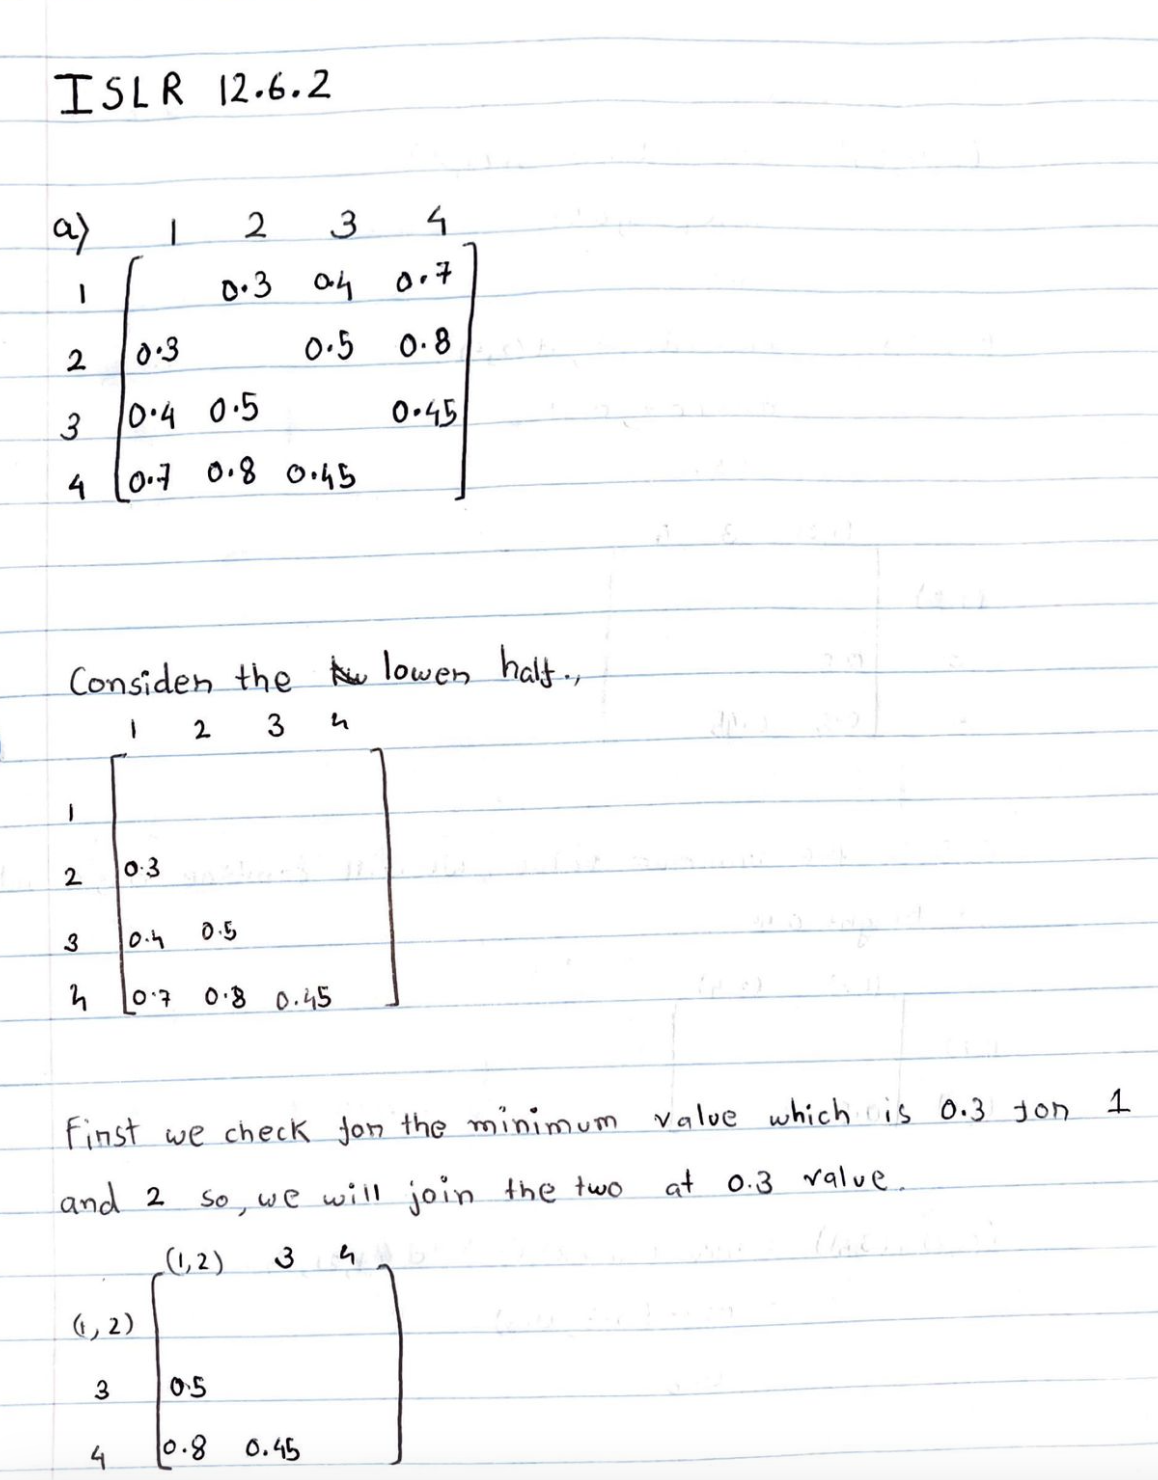

In [1]:
from IPython.display import Image
Image(filename='ISLR12.6.2.1.png')

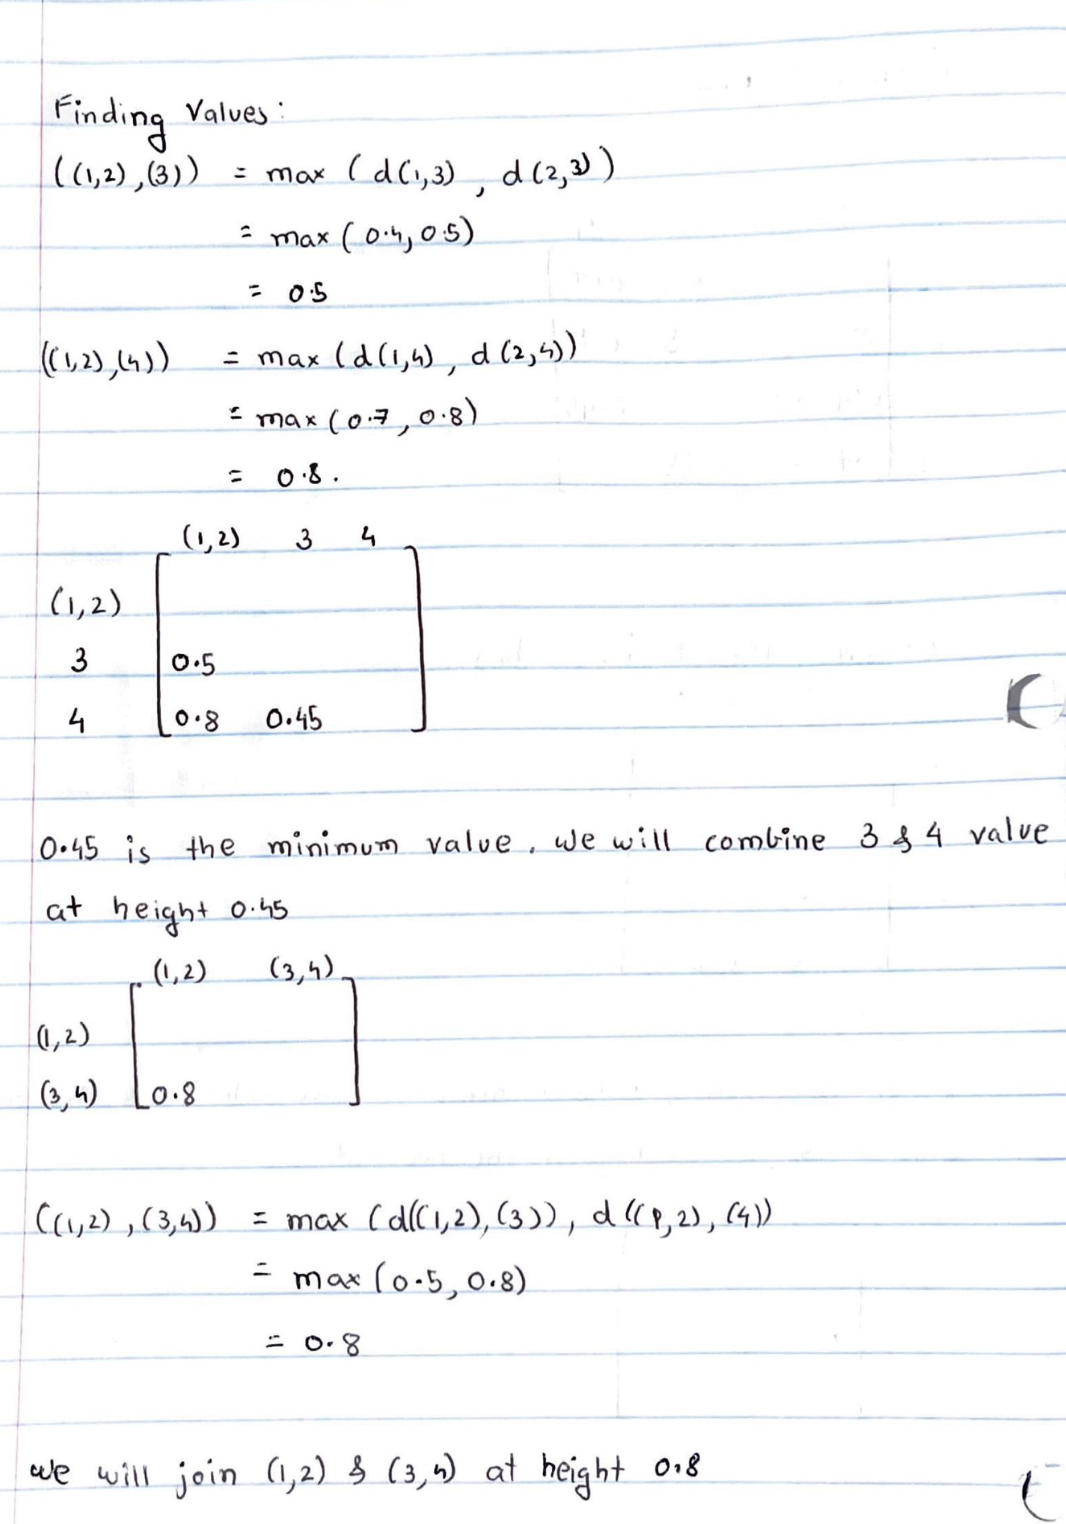

In [2]:
Image(filename='ISLR12.6.2.2.png')

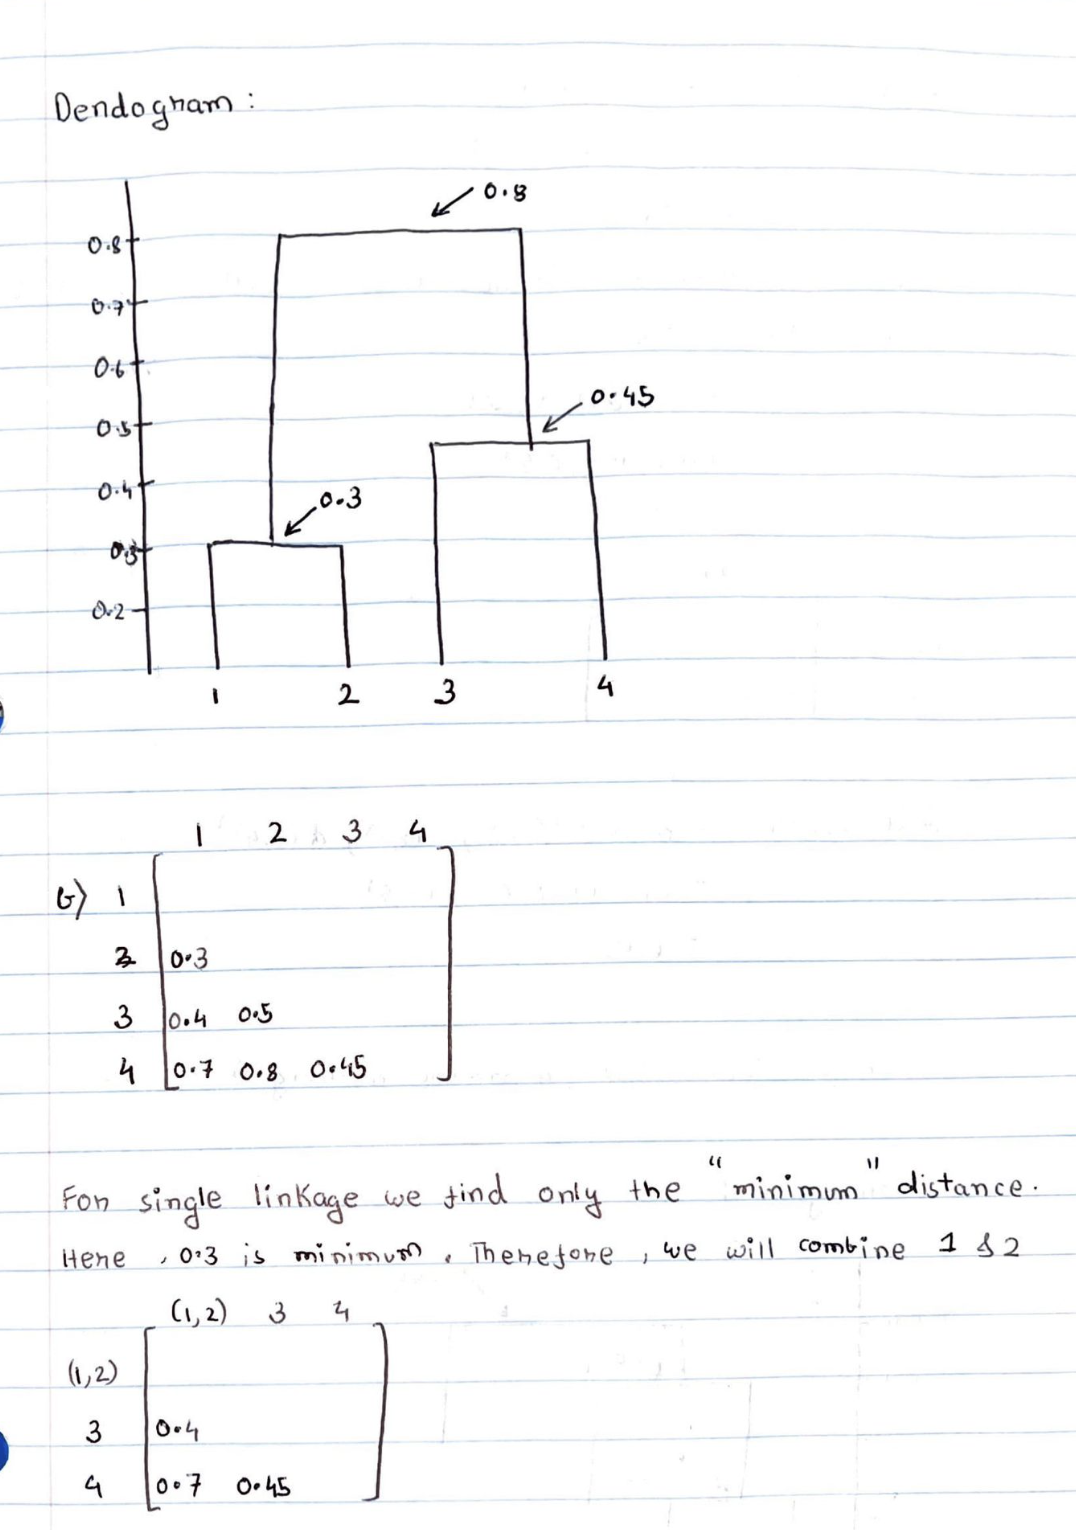

In [3]:
Image(filename='ISLR12.6.2.3.png')

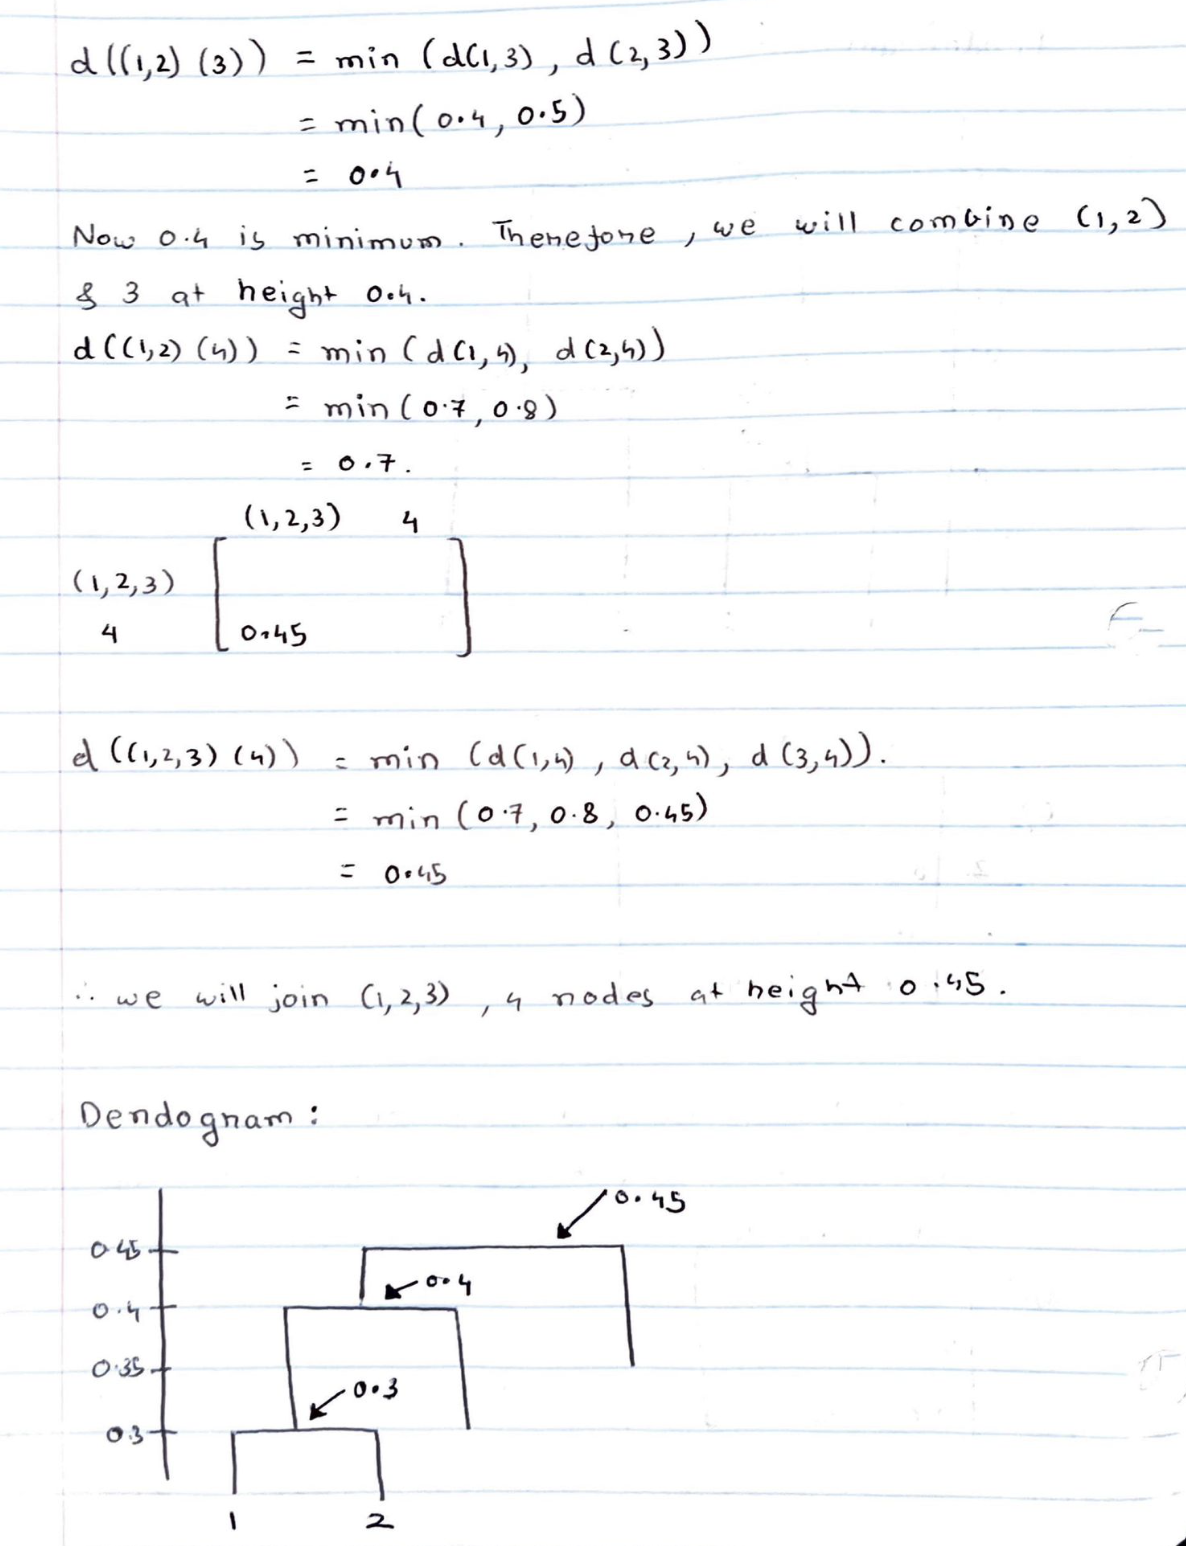

In [4]:
Image(filename='ISLR12.6.2.4.png')

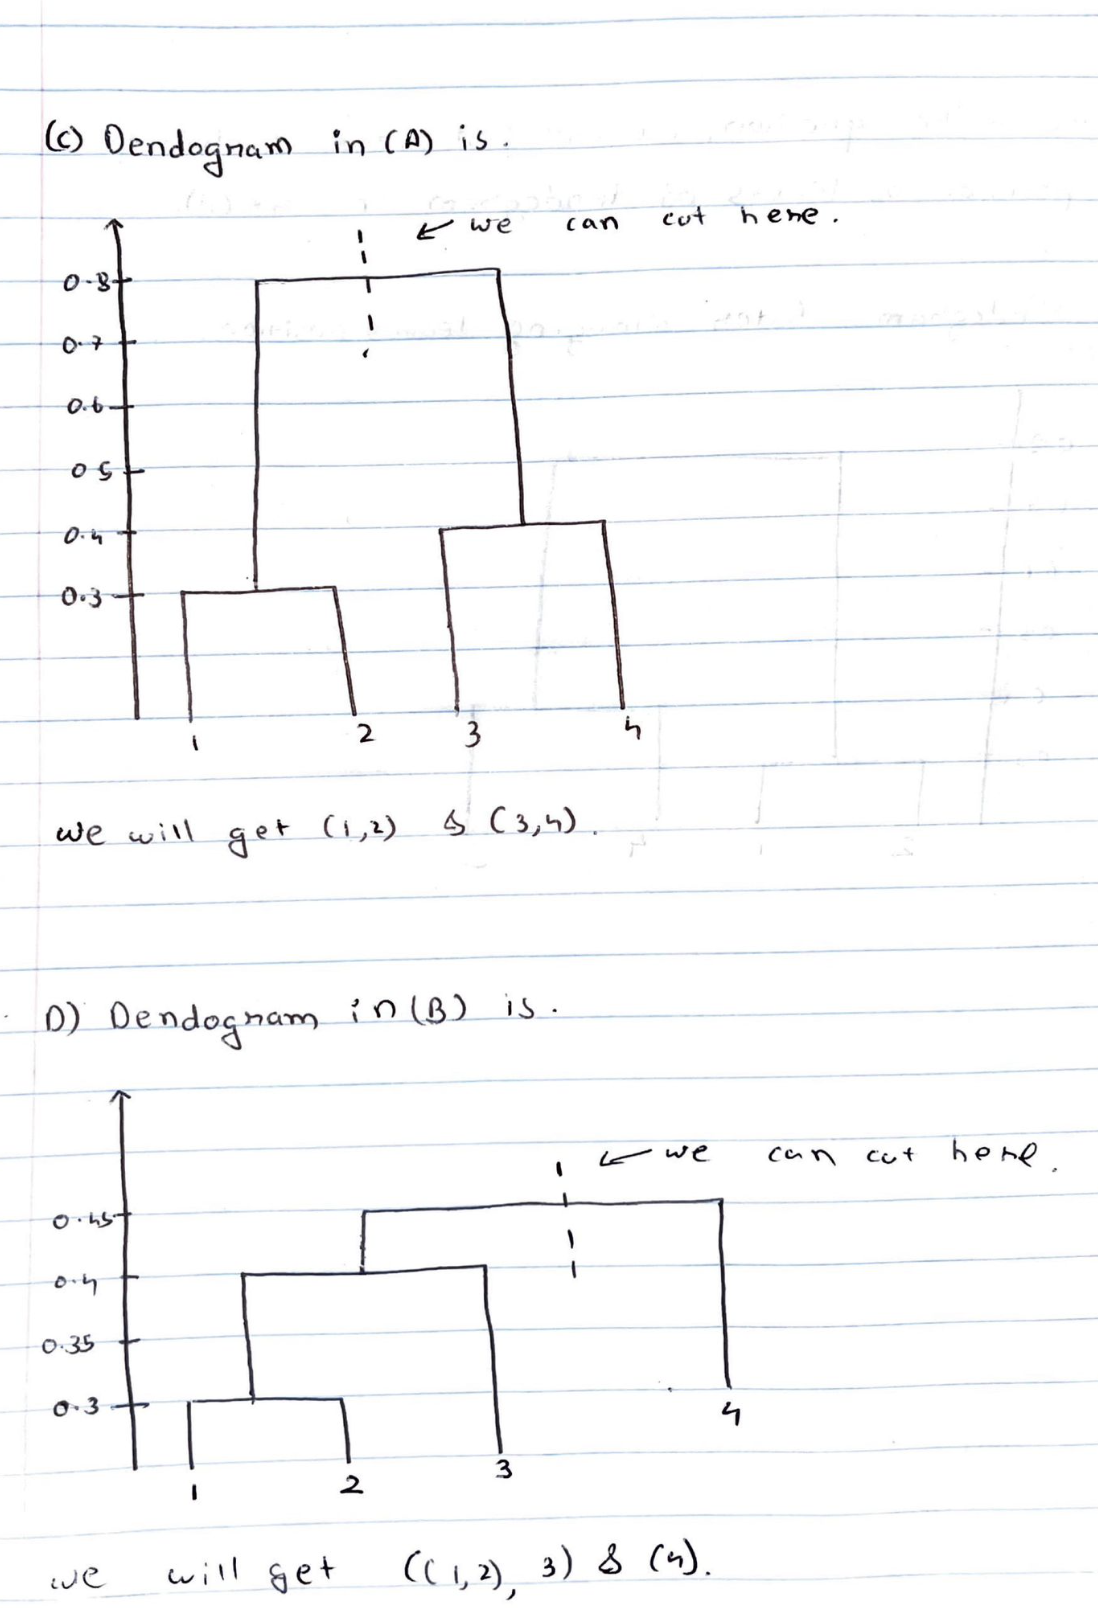

In [5]:
Image(filename='ISLR12.6.2.5.png')

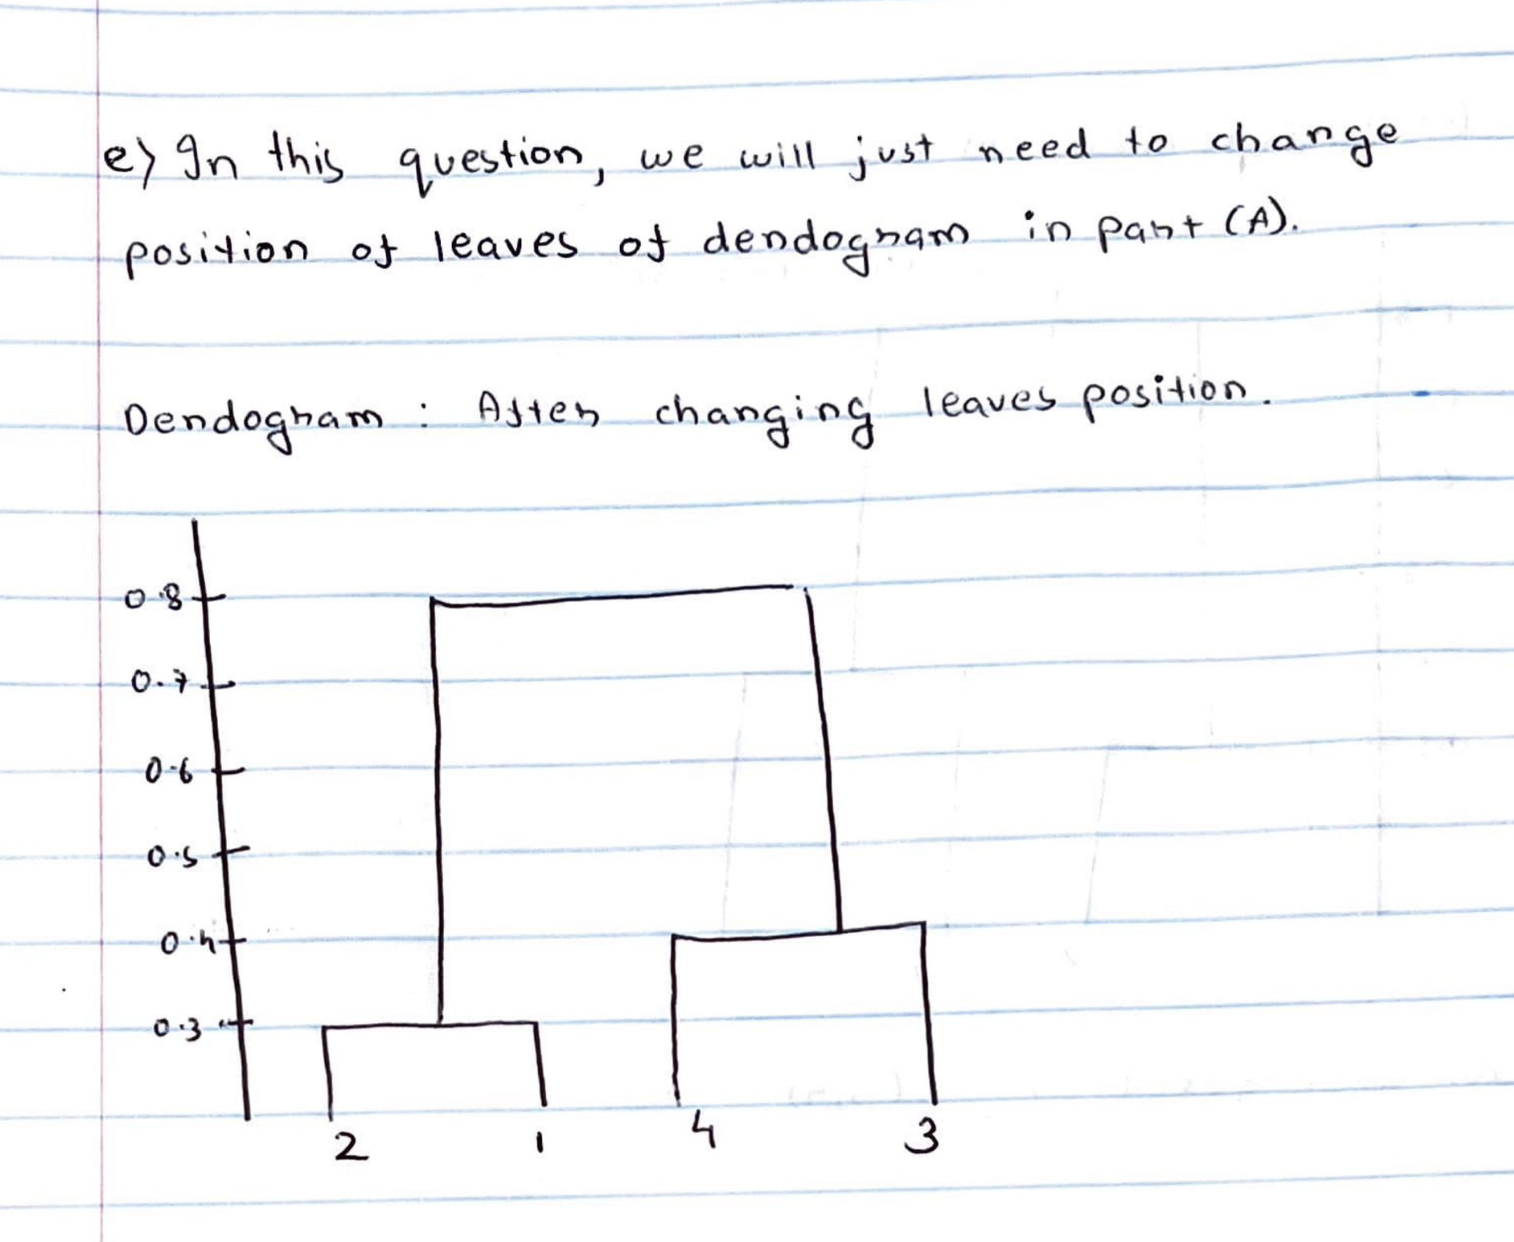

In [6]:
Image(filename='ISLR12.6.2.6.png')